In [1]:
import numpy as np
import tqdm
import h5py
import json
import os
import copy
import matplotlib.pyplot as plt

In [2]:
data_source_json = '../src/dataset/data_source.json'
data_source=json.load(open(data_source_json))

In [3]:
alphas_file="../src/dataset/alphas.json"
alphas=json.load(open(alphas_file))
alphas

{'Mcdm': 0,
 'Mstar': 1,
 'B': 1e-15,
 'HI': 0,
 'Mgas': 0,
 'MgFe': 0,
 'ne': 1e-08,
 'P': 0,
 'T': 0,
 'Z': 1e-09}

Mcdm 13356373000.0 482987160000000.0
Mstar 0.0 25784301000000.0
B 8.407224e-15 1.340396e-06
HI 881.2519 3757965800000.0
Mgas 2632004000.0 24747239000000.0
MgFe 2.4945884 14.896515
ne 9.378888e-08 0.0008780825
P 85.49046 8863431000.0
T 9979.669 18747232.0
Z 3.8727315e-09 0.027581055


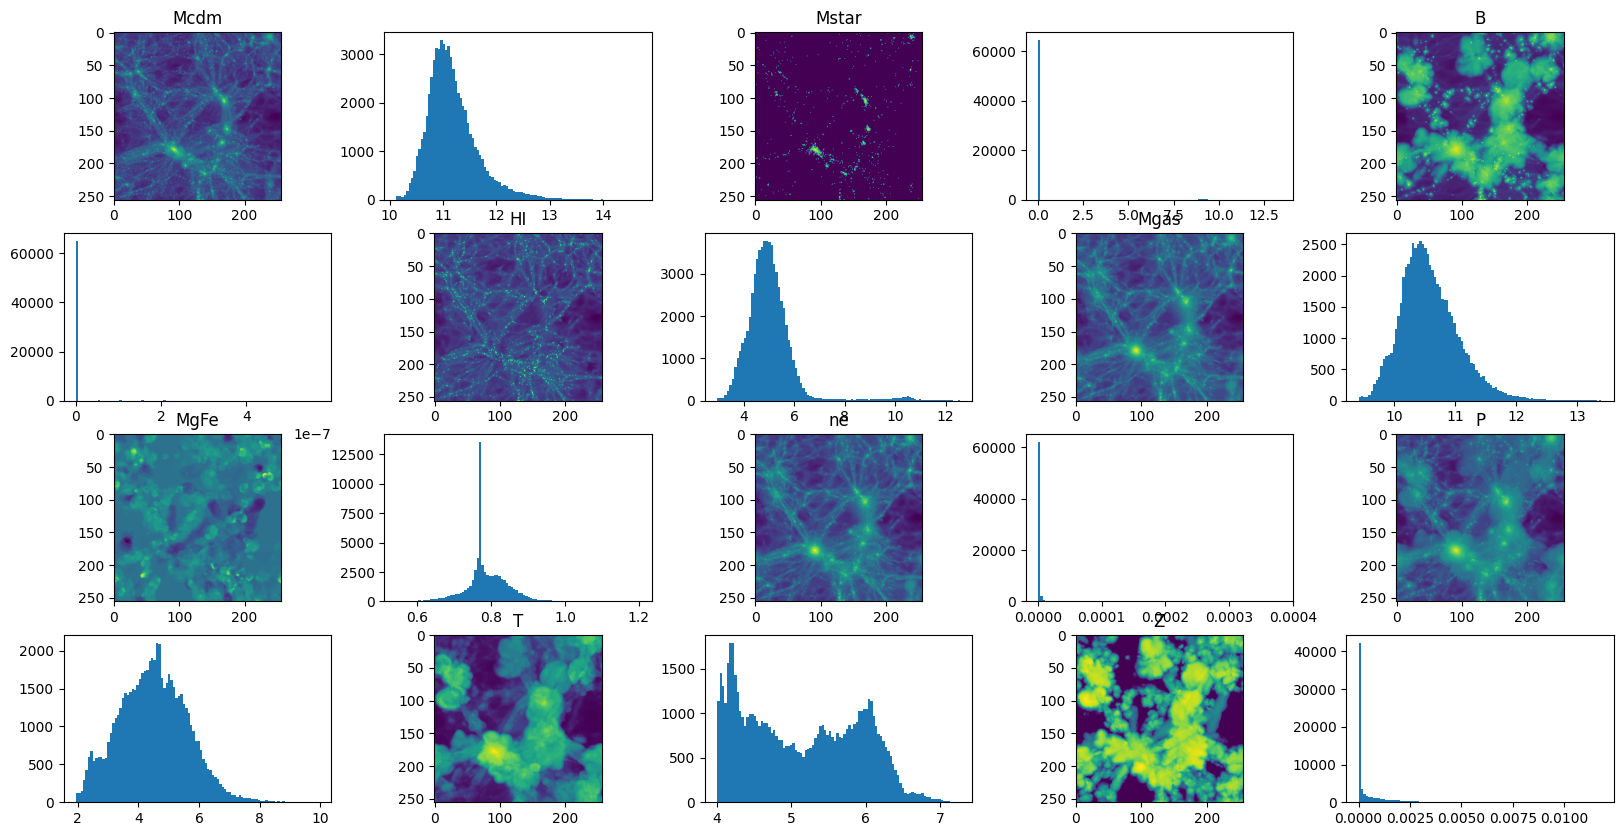

In [4]:
plt.figure(figsize=(20,10))
c=0
mins={}
for key,file_path in data_source["2df3d"]["IllustrisTNG"]["CV"]["z_0.00"].items():
    plt.subplot(4,5,2*c+1)
    data=np.load(file_path)
    min_field=data.min()
    mins[key]=min_field
    field=data[0]
    plt.imshow(np.log10(field+alphas[key]))
    plt.title(key)
    print(key,field.min(),field.max())
    plt.subplot(4,5,2*c+2)
    _=plt.hist(np.log10(field+1).flatten(),bins=100)
    c+=1

In [8]:
norms={}
for dataset_name, dataset_data in data_source.items():
    if dataset_name!="2df3d":
        continue
    for suite_name,suite_data in dataset_data.items():
        if suite_name!="IllustrisTNG":
            continue
        for set_name,set_data in suite_data.items():
            if set_name!="LH":
                continue
            for z_name,z_data in set_data.items():
                for field_name,file_path in z_data.items():
                    data=np.load(file_path).astype(np.float64)
                    data=np.log10(data+alphas[field_name])
                    m=data.mean()
                    s=data.std()
                    print(suite_name,field_name,m,s)
                    norms[field_name+"_m"]=m
                    norms[field_name+"_s"]=s


IllustrisTNG Mcdm 10.971016779411217 0.5087284357004165
IllustrisTNG Mstar 0.11827025731173749 1.0741983915022257
IllustrisTNG B -12.04300638696815 1.984598099344707
IllustrisTNG HI 4.76754097770079 1.0091554313314908
IllustrisTNG Mgas 10.401774406119543 0.49251701692155164
IllustrisTNG MgFe 0.7003930849037634 0.07197104282785632
IllustrisTNG ne -6.039242691961698 0.4845426108432643
IllustrisTNG P 3.901135750866593 1.19730507260193
IllustrisTNG T 4.775720473718215 0.815752282808835
IllustrisTNG Z -5.974338585814151 2.3712616118980567


In [9]:
json_file="../src/dataset/normalizations.json"
json.dump(norms,open(json_file,"w"),indent=2)

In [97]:
#check all CMD files exists
data_to_do=copy.deepcopy(data_source)
for dataset_name, dataset_data in data_source.items():
    for suite_name,suite_data in dataset_data.items():
        for set_name,set_data in suite_data.items():
            #print(set_name)
            for z_name,z_data in set_data.items():
                #print(z_name)
                for field_name,file_path in z_data.items():
                    if not os.path.exists(file_path):
                        del data_to_do[dataset_name][suite_name][set_name][z_name][field_name]
                    #if z_name!="z_0.00" or suite_name!="IllustrisTNG" or set_name not in ["CV","LH"] or field_name not in ["Mcdm","Mstar"]:
                    #    del data_to_do[dataset_name][suite_name][set_name][z_name][field_name]
                    #else:
                    #    assert os.path.exists(file_path),file_path # check if data exists
                    #    print(file_path)

In [67]:
norms={}
for dataset_name,dataset_data in data_to_do.items():
    norms[dataset_name]={}
    for suite_name,suite_data in data_cmd.items():
        norms[dataset_name][suite_name]={}
        for set_name,set_data in suite_data.items():
            for z_name,z_data in set_data.items():
                for field_name,file_path in z_data.items():
                    if set_name=="LH" and z_name=="z_0.00":
                        field=np.load(file_path).astype(np.float64)
                        field_norm=np.log10(field+1)
                        m=field_norm.mean()
                        s=field_norm.std()
                        print(suite_name,field_name,m,s)
                        norms[dataset_name][suite_name][field_name+"_m"]=m
                        norms[dataset_name][suite_name][field_name+"_s"]=s

IllustrisTNG Mcdm 10.983874400198474 0.5082524147347647
IllustrisTNG Mstar 0.12069106611776739 1.0848479055157674
Astrid Mcdm 10.98079829583627 0.5086341926985033
Astrid Mstar 0.25111074552799667 1.5009702669376532
SIMBA Mcdm 10.984280942949646 0.5084985199255352
SIMBA Mstar 0.1544203998236156 1.2289904220960028
IllustrisTNG Mcdm 10.983874400198474 0.5082524147347647
IllustrisTNG Mstar 0.12069106611776739 1.0848479055157674
Astrid Mcdm 10.98079829583627 0.5086341926985033
Astrid Mstar 0.25111074552799667 1.5009702669376532
SIMBA Mcdm 10.984280942949646 0.5084985199255352
SIMBA Mstar 0.1544203998236156 1.2289904220960028


In [68]:
norms

{'2df3d': {'IllustrisTNG': {'Mcdm_m': 10.983874400198474,
   'Mcdm_s': 0.5082524147347647,
   'Mstar_m': 0.12069106611776739,
   'Mstar_s': 1.0848479055157674},
  'Astrid': {'Mcdm_m': 10.98079829583627,
   'Mcdm_s': 0.5086341926985033,
   'Mstar_m': 0.25111074552799667,
   'Mstar_s': 1.5009702669376532},
  'SIMBA': {'Mcdm_m': 10.984280942949646,
   'Mcdm_s': 0.5084985199255352,
   'Mstar_m': 0.1544203998236156,
   'Mstar_s': 1.2289904220960028}},
 'CMD': {'IllustrisTNG': {'Mcdm_m': 10.983874400198474,
   'Mcdm_s': 0.5082524147347647,
   'Mstar_m': 0.12069106611776739,
   'Mstar_s': 1.0848479055157674},
  'Astrid': {'Mcdm_m': 10.98079829583627,
   'Mcdm_s': 0.5086341926985033,
   'Mstar_m': 0.25111074552799667,
   'Mstar_s': 1.5009702669376532},
  'SIMBA': {'Mcdm_m': 10.984280942949646,
   'Mcdm_s': 0.5084985199255352,
   'Mstar_m': 0.1544203998236156,
   'Mstar_s': 1.2289904220960028}}}

In [69]:
#save to json
json_file="../src/dataset/normalizations_old.json"
json.dump(norms,open(json_file,"w"),indent=2)

In [115]:
alphas_file="../src/dataset/alphas.json"
alphas=json.load(open(alphas_file))
alphas

{'Mcdm': 0,
 'Mstar': 1,
 'B': 1e-15,
 'HI': 0,
 'Mgas': 0,
 'MgFe': 0,
 'ne': 1e-08,
 'P': 0,
 'T': 0,
 'Z': 1e-09}

In [120]:
for dataset_name, dataset_data in data_source.items():
    for suite_name,suite_data in dataset_data.items():
        if suite_name!="IllustrisTNG":
            continue
        for set_name,set_data in suite_data.items():
            if set_name!="LH":
                continue
            for z_name,z_data in set_data.items():
                for field_name,file_path in z_data.items():
                    assert os.path.exists(file_path),file_path

In [121]:
norms={}
for dataset_name, dataset_data in data_source.items():
    if dataset_name!="2df3d":
        continue
    for suite_name,suite_data in dataset_data.items():
        if suite_name!="IllustrisTNG":
            continue
        for set_name,set_data in suite_data.items():
            if set_name!="LH":
                continue
            for z_name,z_data in set_data.items():
                for field_name,file_path in z_data.items():
                    data=np.load(file_path).astype(np.float64)
                    data=np.log10(data+alphas[field_name])
                    m=data.mean()
                    s=data.std()
                    print(suite_name,field_name,m,s)
                    norms[field_name+"_m"]=m
                    norms[field_name+"_s"]=s


IllustrisTNG Mcdm 10.971016779411217 0.5087284357004165


KeyError: 'IllustrisTNG'

In [ ]:
json_file="../src/dataset/normalizations.json"
json.dump(norms,open(json_file,"w"),indent=2)

In [114]:
for dataset_name, dataset_data in data_source.items():
    if dataset_name!="CMD":
        continue
    for suite_name,suite_data in dataset_data.items():
        for set_name,set_data in suite_data.items():
            if set_name!="LH":
                continue
            for z_name,z_data in set_data.items():
                for field_name,file_path in z_data.items():
                    if field_name!="Mcdm":
                        continue
                    assert os.path.exists(file_path),file_path

In [ ]:
norms={}
for dataset_name, dataset_data in data_source.items():
    norms[dataset_name]={}
    for suite_name,suite_data in dataset_data.items():
        if suite_name!="IllustrisTNG":
            continue
        norms[dataset_name][suite_name]={}
        for set_name,set_data in suite_data.items():
            if set_name!="LH":
                continue
            for z_name,z_data in set_data.items():
                for field_name,file_path in z_data.items():
                    data=np.load(file_path).astype(np.float64)
                    data=np.log10(data+alphas[field_name])
                    m=data.mean()
                    s=data.std()
                    print(suite_name,field_name,m,s)
                    norms[dataset_name][suite_name][field_name+"_m"]=m
                    norms[dataset_name][suite_name][field_name+"_s"]=s


In [93]:
alphas_file="../src/dataset/alphas.json"
alphas=json.load(open(alphas_file))

Mcdm 13356373000.0 482987160000000.0
Mstar 0.0 25784301000000.0
B 8.407224e-15 1.340396e-06
HI 881.2519 3757965800000.0
Mgas 2632004000.0 24747239000000.0
MgFe 2.4945884 14.896515
ne 9.378888e-08 0.0008780825
P 85.49046 8863431000.0
T 9979.669 18747232.0
Z 3.8727315e-09 0.027581055


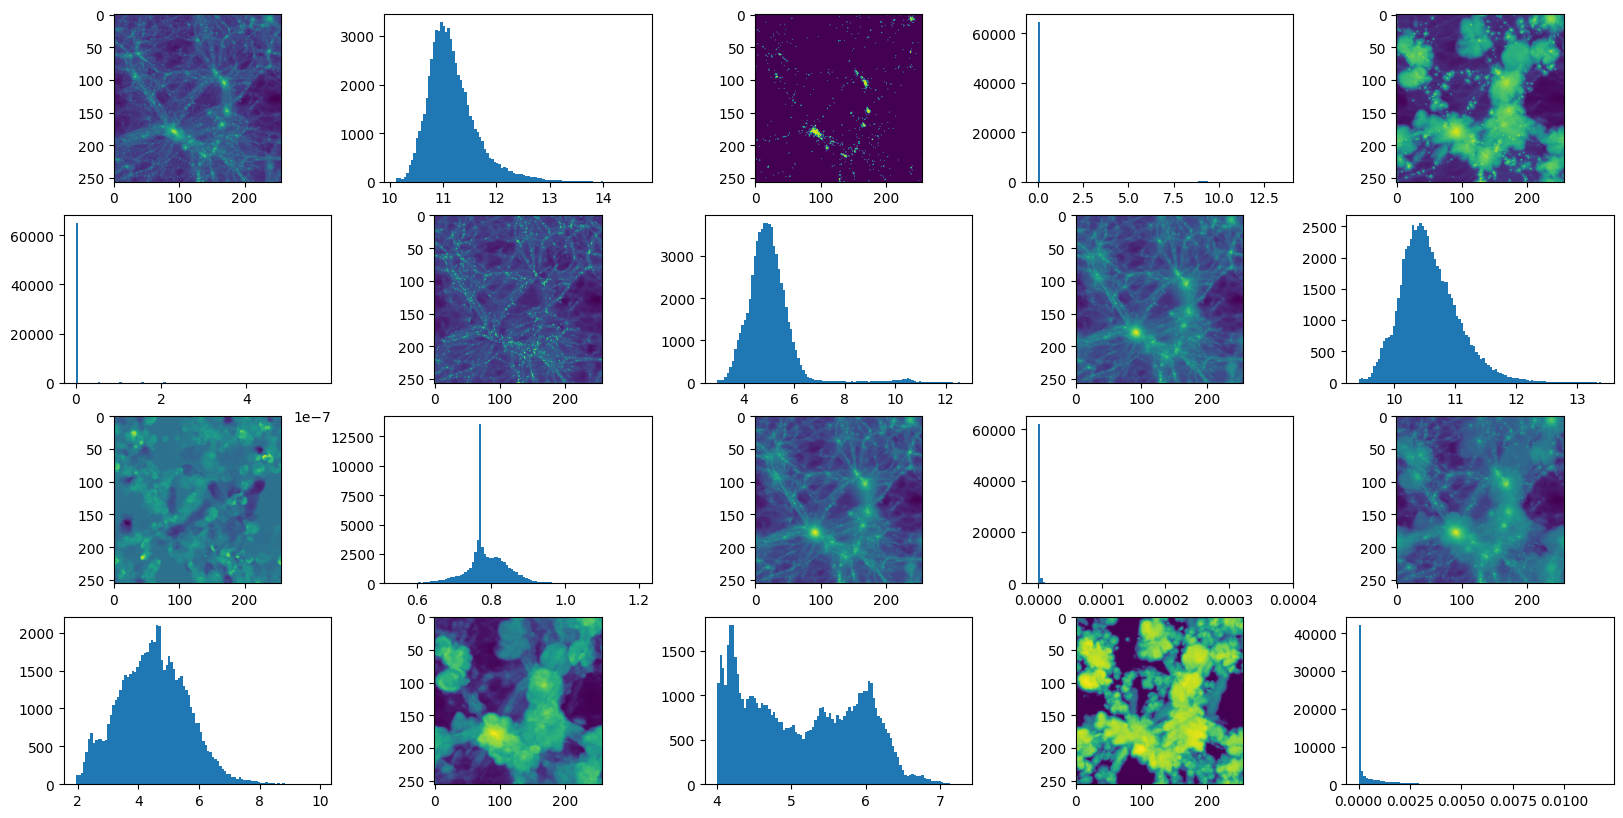

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
c=0
mins={}
for key,file_path in data_source["2df3d"]["IllustrisTNG"]["CV"]["z_0.00"].items():
    plt.subplot(4,5,2*c+1)
    data=np.load(file_path)
    min_field=data.min()
    mins[key]=min_field
    field=data[0]
    plt.imshow(np.log10(field+alphas[key]))
    print(key,field.min(),field.max())
    plt.subplot(4,5,2*c+2)
    _=plt.hist(np.log10(field+1).flatten(),bins=100)
    c+=1

In [92]:
mins

{'Mcdm': 5896866300.0,
 'Mstar': 0.0,
 'B': 3.3957314e-15,
 'HI': 112.24096,
 'Mgas': 1239998200.0,
 'MgFe': 0.53242177,
 'ne': 4.4187228e-08,
 'P': 45.935825,
 'T': 9113.087,
 'Z': 3.8276604e-09}

In [ ]:
json_file="../src/dataset/normalizations.json"
with open(json_file,"r") as f:
    normalizations = json.load(f)

2D 256

In [2]:
fn="/n/holystore01/LABS/itc_lab/Lab/Camels/2d_from_3d/LH256.h5"

In [3]:
with h5py.File(fn,'r') as h5:
    fields=np.array(h5["mstar_z=0.0"])
print(fields.shape)
fsum=0
sqfsum=0
norm=np.prod(fields.shape)
for i in tqdm.tqdm(range(len(fields))):
    a=torch.log10(torch.tensor(fields[i])+1)
    fsum+=a.sum()
    sqfsum+=(a**2).sum()
mean=fsum/norm
std=torch.sqrt(sqfsum/norm-mean**2)
del fields
"Mstar",mean.item(),std.item()

(15000, 256, 256)


100%|██████████| 15000/15000 [00:01<00:00, 8525.66it/s]


('Mstar', 0.11826974898576736, 1.0741989612579346)

In [4]:
with h5py.File(fn,'r') as h5:
    fields=np.array(h5["mcdm_z=0.0"])
print(fields.shape)
fsum=0
sqfsum=0
norm=np.prod(fields.shape)
for i in tqdm.tqdm(range(len(fields))):
    a=torch.log10(torch.tensor(fields[i]))
    fsum+=a.sum()
    sqfsum+=(a**2).sum()
mean=fsum/norm
std=torch.sqrt(sqfsum/norm-mean**2)
del fields
"Mcdm",mean.item(),std.item()

(15000, 256, 256)


100%|██████████| 15000/15000 [00:01<00:00, 10636.72it/s]


('Mcdm', 10.971004486083984, 0.5090954303741455)

In [6]:
#CMD
lh_2d_256_cdm=np.load("/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/Maps_Mcdm_IllustrisTNG_LH_z=0.00.npy")
lh_2d_256_cdm.shape

(15000, 256, 256)

In [9]:
("Mcdm",np.mean(np.log10(lh_2d_256_cdm)),np.std(np.log10(lh_2d_256_cdm),ddof=0))

('Mcdm', 10.9838705, 0.50825393)

In [10]:
lh_2d_256_star=np.load("/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/Maps_Mstar_IllustrisTNG_LH_z=0.00.npy")
lh_2d_256_star.shape

(15000, 256, 256)

In [12]:
("Mstar",np.mean(np.log10(lh_2d_256_star+1)),np.std(np.log10(lh_2d_256_star+1),ddof=0))

('Mstar', 0.120691165, 1.0848483)

3D 128

In [20]:
fn="/n/holystore01/LABS/itc_lab/Lab/Camels/3D_grids_128_z/3D_LH_128.h5"

In [21]:
with h5py.File(fn,'r') as h5:
    fields=np.array(h5["mstar_z=0.0"])
print(fields.shape)
fsum=0
sqfsum=0
norm=np.prod(fields.shape)
for i in tqdm.tqdm(range(len(fields))):
    a=torch.log10(torch.tensor(fields[i])+1)
    fsum+=a.sum()
    sqfsum+=(a**2).sum()
mean=fsum/norm
std=torch.sqrt(sqfsum/norm-mean**2)
del fields
"Mstar",mean.item(),std.item()

(1000, 128, 128, 128)


100%|██████████| 1000/1000 [00:05<00:00, 191.93it/s]


('Mstar', 0.018657566979527473, 0.43048593401908875)

In [22]:
with h5py.File(fn,'r') as h5:
    fields=np.array(h5["mcdm_z=0.0"])
print(fields.shape)
fsum=0
sqfsum=0
norm=np.prod(fields.shape)
for i in tqdm.tqdm(range(len(fields))):
    a=torch.log10(torch.tensor(fields[i]))
    fsum+=a.sum()
    sqfsum+=(a**2).sum()
mean=fsum/norm
std=torch.sqrt(sqfsum/norm-mean**2)
del fields
"Mcdm",mean.item(),std.item()

(1000, 128, 128, 128)


100%|██████████| 1000/1000 [00:04<00:00, 249.47it/s]


('Mcdm', 10.046289443969727, 0.5584093332290649)

In [3]:
## random stuff
import numpy as np

In [4]:
mass_mstar = np.load("/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/Maps_Mstar_IllustrisTNG_LH_z=0.00.npy")
mass_cdm = np.load("/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/Maps_Mcdm_IllustrisTNG_LH_z=0.00.npy")
params=np.loadtxt("/n/holystore01/LABS/itc_lab/Lab/Camels/2D_maps/params_IllustrisTNG.txt")

In [5]:
mass_mstar.shape,mass_cdm.shape,params.shape

((15000, 256, 256), (15000, 256, 256), (1000, 6))